
# Implement a neural network-based predistorter for the linearization of high power amplifier. Show by simulations how the activation function type (ReLU/sigmoid) and the number of network layers impact the nonlinear noise suppression.


R. Hongyo, Y. Egashira, T. M. Hone and K. Yamaguchi, "Deep Neural Network-Based Digital Predistorter for Doherty Power Amplifiers," in  in IEEE Microwave and Wireless Components Letters, vol. 29, no. 2, pp. 146-148, Feb. 2019, doi: 10.1109/LMWC.2018.2888955.

[[publication link]](https://www.researchgate.net/publication/330540629_Deep_Neural_Network-Based_Digital_Predistorter_for_Doherty_Power_Amplifiers)


# 1. Introduction 


With the rise in communication capacity, **deep neural networks (DNN)** for **digital pre-distortion (DPD)** to correct non-linearity in wideband **power amplifiers (PAs)** have become prominent for signal amplification in transmission. High PAs exhibit inherent **nonlinear characteristics** that can lead to significant **signal distortion** and spectral regrowth, compromising signal integrity and regulatory compliance. DPD has emerged as a viable solution to counteract these nonlinear effects by applying a predistortion function to the input signal.


<div>
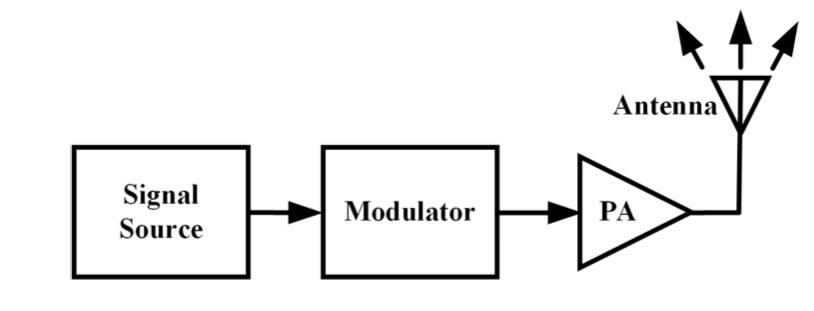
<div style="text-align: center;" markdown="1"> Pic. 1. Pictorial representation of different components in an RF transmitter chain.  </div>
</div>
           

**Traditional DPD methods (ex. polynomial modeling), struggle to capture the complex nonlinearities.** In contrast, recent advancements in deep learning offer a promising approach for enhancing DPD performance. Neural networks are capable of learning intricate patterns from data, making them suitable for modeling the nonlinear behavior of HPAs.



<div>
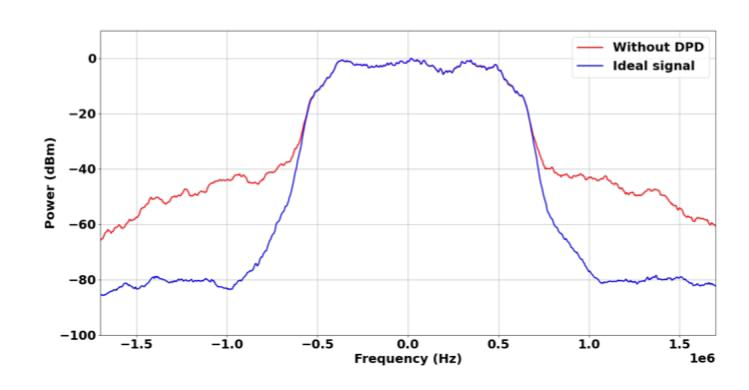 <div style="text-align: center;" markdown="1"> Pic. 2. Input signal and the signal distorted by the PA (Red) are plotted. Spectral regrowth of third order harmonics is visible in the distorted signal. </div>
</div>


        
        
This publication aims to implement a neural network-based predistorter specifically designed for linearizing Doherty power amplifiers (DPAs). It will investigate the impact of Rectified Linear Unit (ReLU) and sigmoid activation functions, and varying numbers of network layers on the effectiveness of nonlinear noise suppression. Simulations will be conducted to evaluate improvement of signal quality.


**MAIN OBJECTIVE:** To create a neural network model that serves as a predistorter for HPAs and to evaluate how varying the activation function type and number of layers affects nonlinear noise suppression.

1. How does the choice of activation function influence the performance of neural network-based predistortion?
2. What effect does varying the number of layers in a neural network have on its capability to suppress nonlinear noise?


## Preliminaries

### Power Amplifiers and Non-Linearity Problem

High power amplifiers (HPAs) amplify signals to transmit over long distances. 

**The performance of PA in the transmitter chain is the bottleneck of the linearity.** However, the linearity of the PA, is limited due to the non-idealites of the active devices (i.e transistors). This non-linear behavior of PA becomes a severe issue when it operates with high PAPR signals, leading to significant decrease in adjacent channel to power ratio (ACPR) and degrading the quality of communications.

<div>
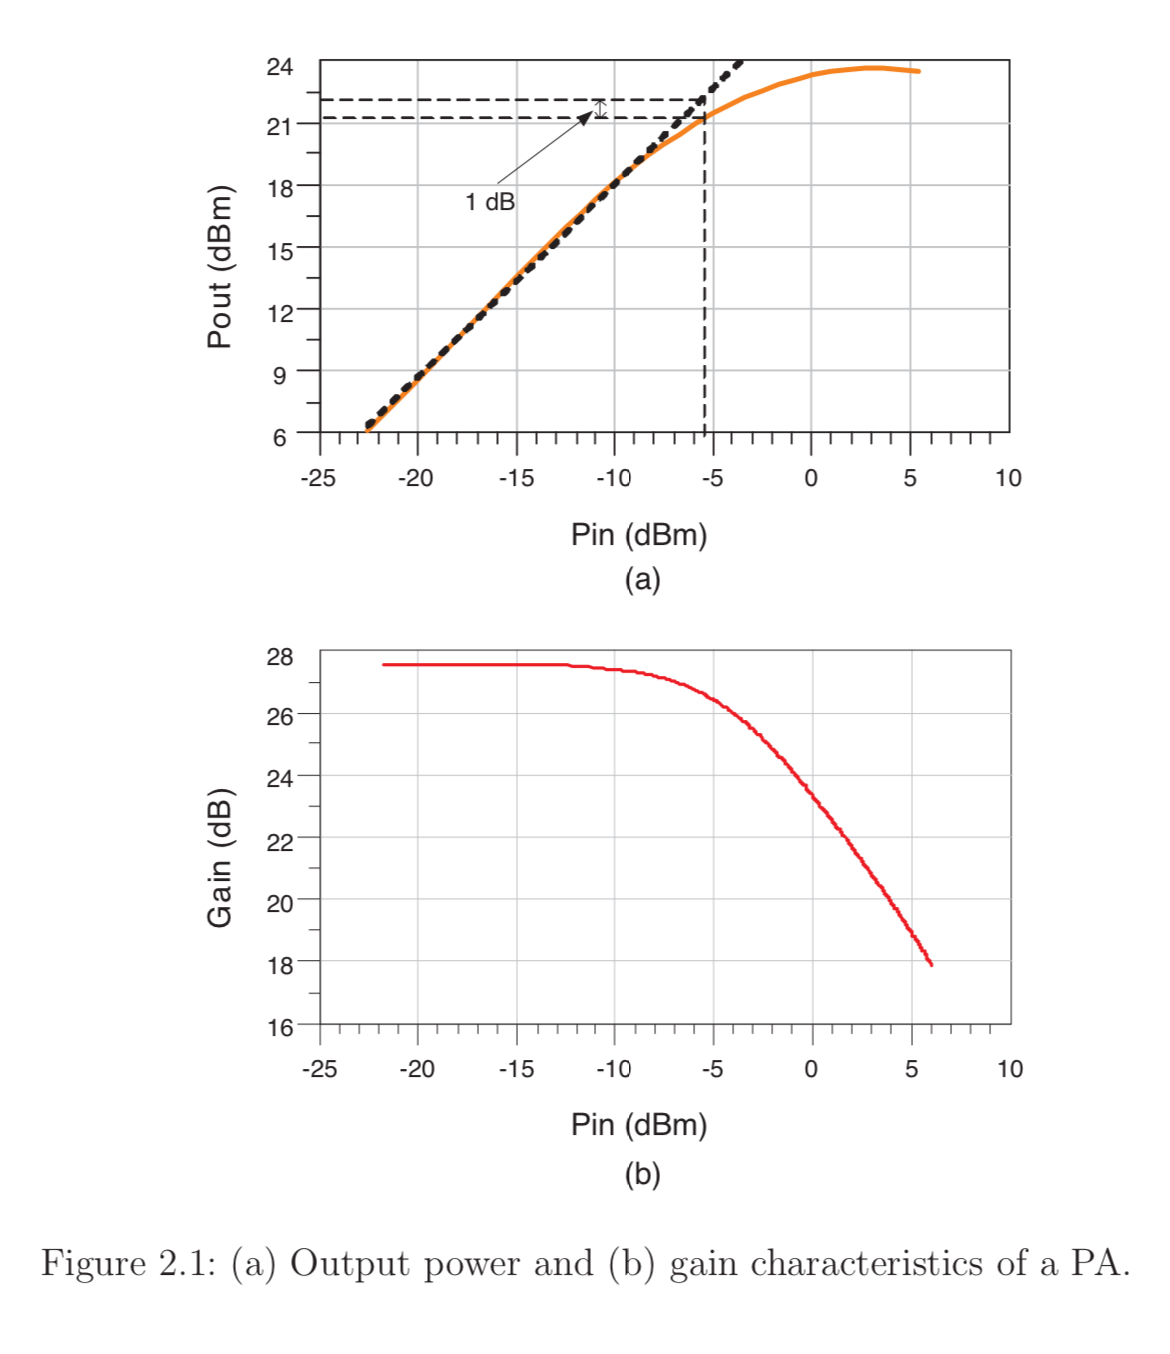 
</div>


### Doherty Power Amplifiers 

<img src="https://www.5gtechnologyworld.com/wp-content/uploads/2021/03/Witte_Doherty_Fig2.png" width=800 />
<div style="text-align: center;" markdown="1"> Pic. 4 The classic Doherty amplifier uses two amplifier paths to optimize power efficiency.</div>

A significant advancement in RF amplification technology is Doherty Power Amplifiers (DPAs). They are widely used in modern communication systems. 
- Basic Principles: The Doherty amplifier operates using a dual-stage amplification architecture that consists of a carrier amplifier and a peaking amplifier. The carrier amplifier is typically biased in Class AB or Class B mode, providing linear amplification for low to moderate power levels. The peaking amplifier, often biased in Class C mode, activates during high-output power demands, thus enhancing efficiency without compromising linearity.
- Carrier Amplifier: Handles lower amplitude signals and operates continuously.
- Peaking Amplifier: Engages only when needed, providing additional amplification during high power demands.

**This design allows the Doherty amplifier to maintain high linearity at lower output levels while achieving improved efficiency at higher output levels.**



### Digital Predistorters


One effective solution is designing a **digital predistorter (DPD)**, which modifies the signal accounting for the non-linearity of the PA.

The core principle behind predistortion is to **apply a nonlinear transformation** to the input signal that counteracts the nonlinearities introduced by the amplifier. This transformation can be modeled using various mathematical approaches, including Volterra series and polynomial models. 


#### Traditional DPD Techniques:

- **Volterra Series:** This method models nonlinear systems using a series expansion that captures both memory effects and nonlinearity but can become computationally intensive.
- **Polynomial Models:** These models use polynomial equations to approximate the amplifier's transfer characteristics but may not generalize well across different operating conditions.
    
However, these traditional methods may struggle with complex nonlinearities present in modern HPAs. 


### Deep Learning Approach 

Neural networks, particularly deep neural networks (DNNs), offer a flexible framework for modeling such nonlinear relationships due to their ability to learn complex functions from data. By training on input-output pairs from the amplifier, a neural network can learn to predict the necessary predistortion that will result in a linear output. Key components involved in this process include:

From DL standpoint, the function of the DPD can be interpreted as an sequence to sequence conversion task, where given a input signal in digital domain, the DPD predistorts the signal and outputs a sequence such that it improves the linearity of the PA. 
 

# Article Summary
In this letter, authors measured adjacent channel leakage ratio (ACLR) results using a GaN (Gallium Nitride) Doherty power amplifier.


Methodology:
- The authors propose a DNN architecture that is trained to model the non-linear behavior of DPAs.
- The training dataset is generated using simulations or measurements from the actual DPA, capturing its input-output characteristics.
- The DNN is designed to predict the required predistortion based on the input signal.


Results:
1.  For less than 2000 coefficients, sigmoid activated deep neural network (DNN)-based digital predistorter (DPD) outperforms rectified linear unit (ReLU) activation by up to 2 dB even when the number of layers of the network is increased.
2. When the number of coefficients exceeds 2000, the ReLU activation surpasses sigmoid activation.
3. To achieve an ACLR level of -54 dBc or better, the DNN-DPD requires significantly fewer coefficients when using ReLU activation.
4. Specifically, the number of coefficients can be reduced by a factor of 150 compared to using sigmoid activation.

Conclusion:
- The proposed DNN-based predistorter shows significant improvement in linearity compared to traditional predistortion techniques.
- Experimental results demonstrate that the DNN can effectively reduce distortion and improve the overall performance of the amplifier.





# Neural Network Design

OpenDPD is an end-to-end learning framework built in PyTorch for modeling power amplifiers (PA) and digital pre-distortion. [OpenDPD](https://arxiv.org/html/2401.08318v2)

<img src="https://arxiv.org/html/2401.08318v2/x2.png" width=800 />

 
- **Activation Functions:** Non-linear functions such as ReLU (Rectified Linear Unit) and sigmoid are crucial for introducing non-linearity into the neural network. They enable the network to learn complex patterns and relationships within the data.
- **Loss Function:** A loss function quantifies how well the neural network's predictions match the desired output. Common choices for DPD applications include Mean Squared Error (MSE) or custom loss functions designed to minimize distortion metrics.
- **Training Process:**  The training involves adjusting the weights of the neural network through backpropagation based on the error calculated from the loss function.
- **Network Architecture:**
    - Input Layer: Design an input layer that matches the dimensions of your data.
    - Hidden Layers: Vary the number of hidden layers (e.g., 1 to 5 layers). Choose between ReLU and sigmoid activation functions for each layer.
    - Output Layer: Design an output layer that predicts the desired output (predistorted signal).


In [ ]:
!pip --version

pip 24.1.2 from /usr/local/lib/python3.10/dist-packages/pip (python 3.10)


In [ ]:
!pip list | grep tensor
!pip list | grep torch

pytensor                           2.25.5
safetensors                        0.4.5
tensorboard                        2.17.0
tensorboard-data-server            0.7.2
tensorflow                         2.17.0
tensorflow-datasets                4.9.6
tensorflow-hub                     0.16.1
tensorflow-io-gcs-filesystem       0.37.1
tensorflow-metadata                1.16.1
tensorflow-probability             0.24.0
tensorstore                        0.1.66
torch                              2.5.0+cu121
torchaudio                         2.5.0+cu121
torchsummary                       1.5.1
torchvision                        0.20.0+cu121


In [ ]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import time
import os
import pandas as pd

In [ ]:
def set_cuda_device(device_index=0):
    # Check if GPUs are available
    gpus = tf.config.experimental.list_physical_devices('GPU')
    if gpus:
        # Print available GPUs
        print("::: Available GPUs: %d" % len(gpus))

        # Check if the specified device index is valid
        if device_index < len(gpus):
            # Set memory growth to avoid allocating all GPU memory at once
            tf.config.experimental.set_memory_growth(gpus[device_index], True)
            print("::: Using GPU %d: %s" % (device_index, gpus[device_index].name))
            print("--------------------------------------------------------------------")
            return gpus[device_index]
        else:
            print("::: Invalid GPU index. Using CPU instead.")
            return tf.device("CPU")
    else:
        print("::: Available GPUs: None")
        print("--------------------------------------------------------------------")
        return tf.device("CPU")

# Set the CUDA device
device = set_cuda_device(device_index=0)  # Change index as needed

::: Available GPUs: None
--------------------------------------------------------------------


## Data Preparation
I and Q refer to the In-phase and Quadrature components of a complex signal.
Collect and preprocess data from HPA. This typically includes input-output pairs where the input is the signal fed into the amplifier and the output is the distorted signal.

For demonstration purposes create synthetic pseudo-random data. Afterwards we can use [Digital Power Amplifier with 200 MHz OFDM Signals](https://github.com/lab-emi/OpenDPD/tree/main/datasets) dataset from IEEE OpenDPD project.

<img src="https://arxiv.org/html/2401.08318v2/x3.png" width=800 />

In many deep learning fields, standardized datasets direct research. For example, MNIST is fundamental for image classification. Yet, the DPD field presents inconsistent experimental setups and diverse learning methodologies. This variability complicates objective evaluations of DPD models and emphasizes the need for a benchmark similar to MNIST.


In [ ]:
# artificial data for relu
def generate_data(num_samples):
    # Simulate input signals (I and Q components)
    I = np.random.uniform(-1, 1, num_samples)
    Q = np.random.uniform(-1, 1, num_samples)

    # Simulate a simple nonlinear distortion (e.g., cubic nonlinearity)
    output_I = I + 0.5 * I**3 - 0.2 * Q**2
    output_Q = Q + 0.5 * Q**3 - 0.2 * I**2
    return np.column_stack((I, Q)), np.column_stack((output_I, output_Q))


In [ ]:

# Define the URL and local path for the dataset
filenames = ['test_input.csv', 'test_output.csv', 'train_input.csv', 'train_output.csv', 'val_input.csv', 'val_output.csv' ]
url = "https://github.com/lab-emi/OpenDPD/raw/main/datasets/DPA_200MHz"
local_file_path = "DPA_200MHz.csv"

for filename in filenames:
  # Download the file if it doesn't exist
  if not os.path.exists(filename):
      import requests
      response = requests.get(url+'/'+filename)
      with open(filename, 'wb') as f:
          f.write(response.content)

print("Dataset downloaded successfully.")

Dataset downloaded successfully.


In [ ]:
# Load the dataset into a DataFrame
X_train = pd.read_csv('train_input.csv').to_numpy()
X_test = pd.read_csv('test_input.csv').to_numpy()
X_val = pd.read_csv('val_input.csv').to_numpy()
y_train = pd.read_csv('train_output.csv').to_numpy()
y_test = pd.read_csv('test_output.csv').to_numpy()
y_val = pd.read_csv('val_output.csv').to_numpy()

validation_data = (X_val, y_val)
test_data = (X_test, y_test)
# Display the first few rows of the dataset
print(X_train.shape, X_test.shape, X_val.shape)

def rescale_to_unit_interval(data): #[0, 1]
    return (data - data.min()) / (data.max() - data.min())

#data['I'] = rescale_to_unit_interval(data['I'])
#data['Q'] = rescale_to_unit_interval(data['Q'])

print("Data preprocessing completed.")
print(X_train.min(), X_train.max(), y_train.min(), y_train.max())

(23040, 2) (7680, 2) (7680, 2)
Data preprocessing completed.
-0.990824287 0.992428753 -2.498390741 2.508604766


## RELU activation function
<img src="https://cdn.prod.website-files.com/5d7b77b063a9066d83e1209c/60d24d1ac2cc1ded69730feb_relu.jpg" width=400/>

$$f(x) = \max(0,x) $$

Advantages:

- Since only a certain number of neurons are activated, the ReLU function is far more computationally efficient when compared to the sigmoid and tanh functions.
- ReLU accelerates the convergence of gradient descent towards the global minimum of the loss function due to its linear, non-saturating property.

Limitations:

- The Dying ReLU problem

In [ ]:
# Define the model
model_relu = keras.Sequential([
    layers.Input(shape=(2,)),  # Input shape for I and Q components
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(2)  # Output layer for predistorted I and Q components
])

model_relu.compile(optimizer='adam', loss='mse')

start = time.time()
history_relu = model_relu.fit(X_train, y_train, epochs=100, batch_size=128, validation_data=validation_data, verbose=0)
end = time.time()
print('training time = ', end - start)


training time =  58.22097587585449


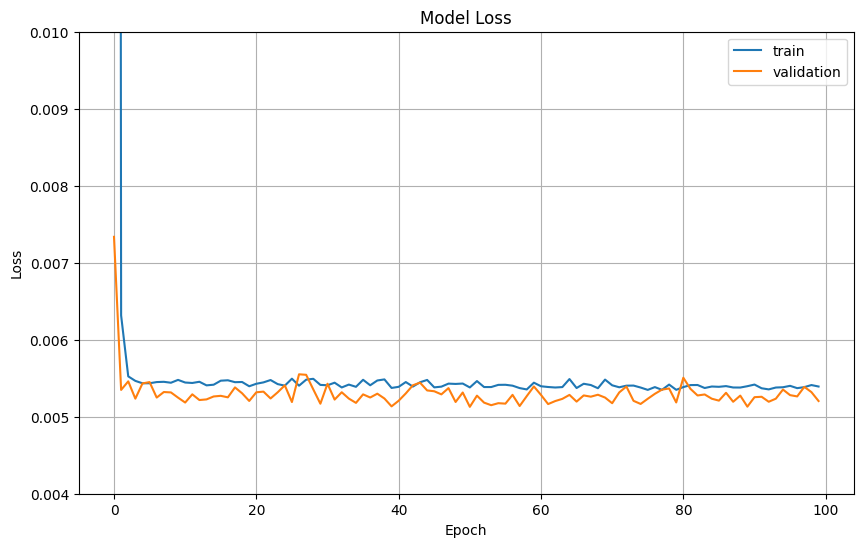

240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
loss for I: 0.005737245548516512 
loss for Q: 0.005852921865880489


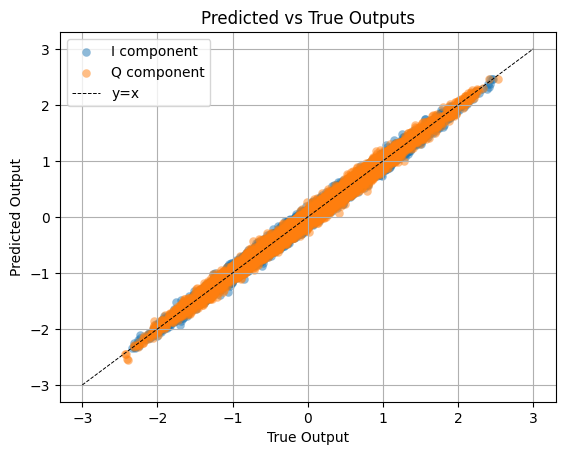

In [ ]:
# Plot training history
plt.figure(figsize=(10,6))
plt.plot(history_relu.history['loss'], label='train')
plt.plot(history_relu.history['val_loss'], label='validation')

plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.ylim([0.004, 0.01])
plt.grid()
plt.show()

predictions = model_relu.predict(X_test)
lossI = keras.losses.MSE(y_test[:, 0], predictions[:, 0])
lossQ = keras.losses.MSE(y_test[:, 1], predictions[:, 1])
print('loss for I:', float(lossI),'\nloss for Q:', float(lossQ))
# Compare predictions with actual outputs
plt.scatter(y_test[:, 0], predictions[:, 0], linewidths=0.08, label='I component', alpha=0.5)
plt.scatter(y_test[:, 1], predictions[:, 1], linewidths=0.08, label='Q component', alpha=0.5)
plt.plot([-3, 3], [-3, 3], 'k--', linewidth=0.7, label='y=x')
plt.title('Model Loss')
plt.xlabel('True Output')
plt.ylabel('Predicted Output')
plt.title('Predicted vs True Outputs')
plt.legend()
plt.grid()
plt.show()


## Sigmoid activation function
<img src="https://cdn.prod.website-files.com/5d7b77b063a9066d83e1209c/60d24547f85f71e3bd2339f8_pasted%20image%200%20(5).jpg" width=400/>

$$f(x) = \frac{1}{1+e^{-x}} $$

This function takes any real value as input and outputs values in the range of 0 to 1. The larger the input, the closer the output value will be to 1.0, whereas the smaller the input, the closer the output will be to 0.0.


Advantages:

- It is commonly used for models where we have to predict the probability as an output. Since probability of anything exists only between the range of 0 and 1, sigmoid is the right choice because of its range.
- The function is differentiable and provides a smooth gradient, i.e., preventing jumps in output values. This is represented by an S-shape of the sigmoid activation function.

Limitations:
- Need to normalize data
- Vanishing gradients problem



In [ ]:
# artificial data for sigmoid
def generate_data_normalized(num_samples):
    I = np.random.uniform(-1, 1, num_samples)
    Q = np.random.uniform(-1, 1, num_samples)
    output_I = I + 0.5 * I**3 - 0.2 * Q**2
    output_Q = Q + 0.5 * Q**3 - 0.2 * I**2

    # Normalize inputs to [0, 1]
    I_normalized = (I + 1) / 2
    Q_normalized = (Q + 1) / 2

    # Normalize outputs to [0, 1]
    output_I_normalized = (output_I - np.min(output_I)) / (np.max(output_I) - np.min(output_I))
    output_Q_normalized = (output_Q - np.min(output_Q)) / (np.max(output_Q) - np.min(output_Q))

    return np.column_stack((I_normalized, Q_normalized)), np.column_stack((output_I_normalized, output_Q_normalized))


X_train1 = rescale_to_unit_interval(X_train)
X_test1 = rescale_to_unit_interval(X_test)
X_val1 = rescale_to_unit_interval(X_val)

y_train1 = rescale_to_unit_interval(y_train)
y_test1 = rescale_to_unit_interval(y_test)
y_val1 = rescale_to_unit_interval(y_val)

validation_data1 = (X_val1, y_val1)
test_data1 = (X_test1, y_test1)
# X, y = generate_data_normalized(10000)


model_sigm = keras.Sequential([
    layers.Input(shape=(2,)),
    layers.Dense(64, activation='sigmoid'),
    layers.Dense(64, activation='sigmoid'),
    layers.Dense(2)
])
model_sigm.compile(optimizer='adam', loss='mse')


start = time.time()
history_sigm = model_sigm.fit(X_train1, y_train1, epochs=100, batch_size=128, validation_data=validation_data1, verbose=0)
end = time.time()
print('training time = ', end - start)

training time =  64.30645680427551


In [ ]:
# for artificial datasets
def data_invert_norm(X, y):
    I_normalized = X[:, 0]
    Q_normalized = X[:, 1]
    output_I_normalized = y[:, 0]
    output_Q_normalized = y[:, 1]
    # Invert normalization for inputs
    I = (2 * I_normalized) - 1
    Q = (2 * Q_normalized) - 1

    # Invert normalization for outputs
    output_I = (output_I_normalized * (1.5 + 1.7)) - 1.7
    output_Q = (output_Q_normalized * (1.5 + 1.7)) - 1.7

    return np.column_stack((I, Q)), np.column_stack((output_I, output_Q))

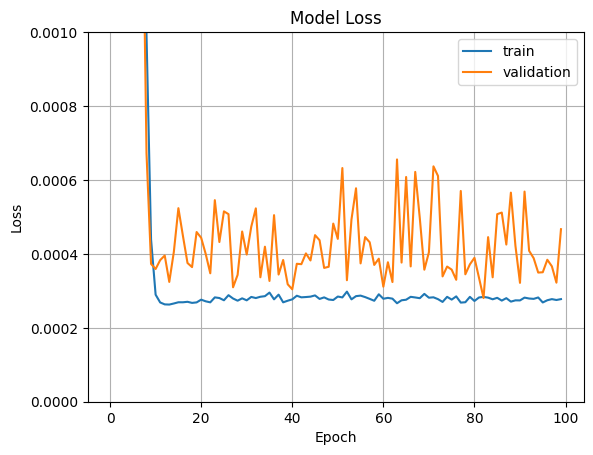

240/240 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
loss for I: 0.0002639261947479099 
loss for Q: 0.00027501690783537924


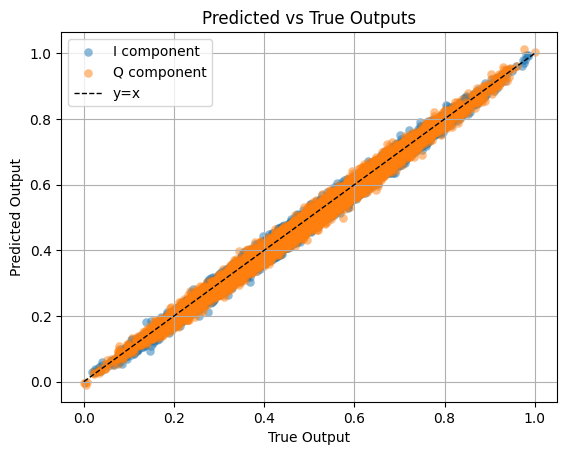

In [ ]:
plt.plot(history_sigm.history['loss'], label='train')
plt.plot(history_sigm.history['val_loss'], label='validation')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.ylim([0, 0.001])
plt.grid()
plt.show()

predictions1 = model_sigm.predict(X_test1)
#X_test, y_test = data_invert_norm(X_test, y_test)
#_, predictions = data_invert_norm(X_test, predictions)

lossI = keras.losses.MSE(y_test1[:, 0], predictions1[:, 0])
lossQ = keras.losses.MSE(y_test1[:, 1], predictions1[:, 1])
print('loss for I:', float(lossI),'\nloss for Q:', float(lossQ))

# Compare predictions with actual outputs
plt.scatter(y_test1[:, 0], predictions1[:, 0], linewidths=0.1, label='I component', alpha=0.5)
plt.scatter(y_test1[:, 1], predictions1[:, 1], linewidths=0.1, label='Q component', alpha=0.5)
plt.plot([0, 1], [0, 1], 'k--', linewidth=1, label='y=x')
plt.xlabel('True Output')
plt.ylabel('Predicted Output')
plt.title('Predicted vs True Outputs')
plt.legend()
plt.grid()
plt.show()

## Hyperparameter Tuning
Now we will adjust batch sizes and epochs based on performance metrics.

In [ ]:
epochs_list = [20, 50, 100, 150]
batch_size_list = [16, 64, 256, 512, 1024]

print('RELU MODEL')
print('epoch   |batch_size|\t loss for I \t\t|\t loss for Q')
for epochs in epochs_list:
    for batch_size in batch_size_list:
        model_relu.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=validation_data, verbose=0)
        predictions = model_relu.predict(X_test, verbose=0)
        lossI = keras.losses.MSE(y_test[:, 0], predictions[:, 0])
        lossQ = keras.losses.MSE(y_test[:, 1], predictions[:, 1])
        print(epochs,'  \t| ', batch_size, '\t   | ',  float(lossI), '\t| ', float(lossQ))


print('------------------------------------------------\nSIGMOID MODEL')
print('epoch   |batch_size|\t loss for I \t\t|\t loss for Q')

for epochs in epochs_list:
    for batch_size in batch_size_list:
        model_sigm.fit(X_train1, y_train1, epochs=epochs, batch_size=batch_size, validation_data=validation_data1, verbose=0)
        predictions1 = model_sigm.predict(X_test1, verbose=0)
        lossI = keras.losses.MSE(y_test1[:, 0], predictions1[:, 0])
        lossQ = keras.losses.MSE(y_test1[:, 1], predictions1[:, 1])
        print(epochs,'  \t| ', batch_size, '\t   | ',  float(lossI), '\t| ', float(lossQ))


RELU MODEL
epoch   |batch_size|	 loss for I 		|	 loss for Q
20   	|  16 	   |  0.005949242971837521 	|  0.005866087041795254
20   	|  64 	   |  0.005824236664921045 	|  0.0059825703501701355
20   	|  256 	   |  0.005709141958504915 	|  0.005813299212604761
20   	|  512 	   |  0.005708147305995226 	|  0.0057996222749352455
20   	|  1024 	   |  0.005734667647629976 	|  0.005775755736976862
50   	|  16 	   |  0.006151971407234669 	|  0.005804702173918486
50   	|  64 	   |  0.005827177781611681 	|  0.005899603478610516
50   	|  256 	   |  0.005685026757419109 	|  0.0057686311192810535
50   	|  512 	   |  0.005700104404240847 	|  0.005770378280431032
50   	|  1024 	   |  0.0057033938355743885 	|  0.005773204378783703
100   	|  16 	   |  0.005787983536720276 	|  0.005882695782929659
100   	|  64 	   |  0.005735674407333136 	|  0.005807804875075817
100   	|  256 	   |  0.005733341909945011 	|  0.0058251055888831615
100   	|  512 	   |  0.005736461374908686 	|  0.005798385478556156
100   	|  1

Conclusion:
1. Big batch size speeds up computations significantly.
2. Also big batches improve precision.
3. Model with ReLU activation is overfitting on 150 epochs. 100 epochs is an optimal quantity.
4. Model with sigmoid activation shows different losses for I and Q and behaves unpredictable. It shows good results with either 50 or 150 epochs. So it's better to use less epochs in order to save time and prevent overfitting.

## Tuning the size of DNN
Now we will consider different layers' quantity and size to prove the Hypothesis about impacts of activation functions.

In [ ]:
print('model with ReLU activation:', model_relu.count_params(), ' parameters')
model_relu.summary()
print('----------------------------------------------------------')
print('model with sigmoid activation:', model_sigm.count_params(), ' parameters')
model_sigm.summary()

model with ReLU activation: 4482  parameters


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 64)                  │             192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 2)                   │             130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 13,448 (52.54 KB)

 Trainable params: 4,482 (17.51 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 8,966 (35.03 KB)

----------------------------------------------------------
model with sigmoid activation: 4482  parameters


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                      │ (None, 64)                  │             192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 2)                   │             130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 13,448 (52.54 KB)

 Trainable params: 4,482 (17.51 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 8,966 (35.03 KB)

In [ ]:
layers_list = [1,3,5]
output_size_list = [16, 64, 128, 256, 512, 1024]
epoch = 80
batch_size = 1024
print('RELU MODEL')
print('n layers| num params\t|\t loss for I \t\t|\t loss for Q')
for num_layers in layers_list:
    for out_size in output_size_list:
        model_relu = keras.Sequential()
        model_relu.add(layers.Input(shape=(2,)))
        for _ in range(num_layers):
          model_relu.add(layers.Dense(out_size, activation='relu'))  # Hidden layer with 64 units
          model_relu.add(layers.Dense(out_size))  # Output layer with specified
        model_relu.add(layers.Dense(2))
        model_relu.compile(optimizer='adam', loss='mse')

        model_relu.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=validation_data, verbose=0)
        predictions = model_relu.predict(X_test, verbose=0)
        lossI = keras.losses.MSE(y_test[:, 0], predictions[:, 0])
        lossQ = keras.losses.MSE(y_test[:, 1], predictions[:, 1])
        print(num_layers,'  \t|', model_relu.count_params(), '  \t| ',  float(lossI), '\t| ', float(lossQ))


RELU MODEL
n layers| num params	|	 loss for I 		|	 loss for Q
1   	| 354   	|  0.008250769227743149 	|  0.011293700896203518
1   	| 4482   	|  0.0061820694245398045 	|  0.006115485914051533
1   	| 17154   	|  0.0060785552486777306 	|  0.00614729430526495
1   	| 67074   	|  0.006141806486994028 	|  0.0061332653276622295
1   	| 265218   	|  0.006022990215569735 	|  0.0062037259340286255
1   	| 1054722   	|  0.0060468087904155254 	|  0.006169672589749098
3   	| 1442   	|  0.006213880609720945 	|  0.0062005785293877125
3   	| 21122   	|  0.005918691400438547 	|  0.006044701207429171
3   	| 83202   	|  0.006018826272338629 	|  0.0060212803073227406
3   	| 330242   	|  0.006017542909830809 	|  0.005996501073241234
3   	| 1315842   	|  0.006861588452011347 	|  0.006067139562219381
3   	| 5253122   	|  0.006048374343663454 	|  0.0058208308182656765
5   	| 2530   	|  0.006165380589663982 	|  0.006162144709378481
5   	| 37762   	|  0.0060873874463140965 	|  0.0060964045114815235
5   	| 149250   

In [ ]:
layers_list = [1,3,5]
output_size_list = [16, 64, 128, 256, 512, 1024]
epoch = 50
batch_size = 1024
print('SIGMOID MODEL')
print('n layers| num params\t|\t loss for I \t\t|\t loss for Q')
for num_layers in layers_list:
    for out_size in output_size_list:
        model_sigm = keras.Sequential()
        model_sigm.add(layers.Input(shape=(2,)))
        for _ in range(num_layers):
          model_sigm.add(layers.Dense(out_size, activation='sigmoid'))  # Hidden layer with 64 units
          model_sigm.add(layers.Dense(out_size))  # Output layer with specified
        model_sigm.add(layers.Dense(2))
        model_sigm.compile(optimizer='adam', loss='mse')

        model_sigm.fit(X_train1, y_train1, epochs=epochs, batch_size=batch_size, validation_data=validation_data1, verbose=0)
        predictions1 = model_sigm.predict(X_test1, verbose=0)
        lossI = keras.losses.MSE(y_test1[:, 0], predictions1[:, 0])
        lossQ = keras.losses.MSE(y_test1[:, 1], predictions1[:, 1])
        print(num_layers,'  \t|', model_sigm.count_params(), '  \t| ',  float(lossI), '\t| ', float(lossQ))

SIGMOID MODEL
n layers| num params	|	 loss for I 		    |	 loss for Q
1   	| 354      	    |  0.019302120432257652 	|  0.01876997947692871
1   	| 4482      	|  0.0009540647733956575 	|  0.0008419182267971337
1   	| 17154      	|  0.0006375915254466236 	|  0.0007977519417181611
1   	| 67074      	|  0.009379793889820576 	|  0.008254517801105976
1   	| 265218      	|  0.017429525032639503 	|  0.01860889419913292
1   	| 1054722      	|  0.029572879895567894 	|  0.028104662895202637
2   	| 898      	    |  0.018670042976737022 	|  0.021568359807133675
2   	| 12802      	|  0.01630282960832119 	    |  0.0004780820745509118
2   	| 50178      	|  0.0012681804364547133 	|  0.0012836094247177243
2   	| 198658      	|  0.028662225231528282 	|  0.02698317915201187
2   	| 790530      	|  0.028385480865836143 	|  0.02689261920750141
2   	| 3153922      	|  0.028987044468522072 	|  0.02817690372467041
3   	| 1442      	|  0.0004990458255633712 	|  0.024909717962145805
3   	| 21122      	|  0.000290115422103554 	|  0.0002904532302636653
3   	| 83202      	|  0.027752868831157684 	|  0.0056945704855024815
3   	| 330242      	|  0.016559012234210968 	|  0.02686486206948757
3   	| 1315842      	|  0.028784282505512238 	|  0.026984039694070816
3   	| 5253122      	|  0.028340142220258713 	|  0.027051901444792747
5   	| 2530      	|  0.02814161218702793 	    |  0.00035659674904309213
5   	| 37762      	|  0.02032109536230564 	    |  0.00909922830760479
5   	| 149250      	|  0.011701834388077259 	|  0.017742358148097992
5   	| 593410      	|  0.02182280644774437 	    |  0.02284659631550312
5   	| 2366466      	|  0.028370380401611328 	|  0.02699977532029152
5   	| 9451522      	|  0.028490908443927765 	|  0.027064012363553047

**Best scores:**
1. For model with ReLU: all architectures get similar loss value ~0.006.

2. For model with sigmoid
-  1 layer, output 128 (n_params 17154): Loss for I = 0.00047; Loss for Q = 0.0007;
-  3 layers, output 64 (n_params 21122): Loss for I = 0.0003; Loss for Q = 0.0003;


### Outcomes:

- Model with ReLU does not depend much on the quantity of parameters. 
- Sigmoid activated DNN-based digital predistorter (DPD), outperforms rectified ReLU.
- When the number of coefficients exceeds 50000, the ReLU activation surpasses sigmoid activation.
- Using ReLU can reduce the number of coefficients compared to sigmoid while achieving similar performance levels.


__________________________________________________________________
*Results from the article:*
1.  For less than 2000 coefficients, sigmoid activated deep neural network (DNN)-based digital predistorter (DPD) outperforms rectified linear unit (ReLU) activation by up to 2 dB even when the number of layers of the network is increased.
2. When the number of coefficients exceeds 2000, the ReLU activation surpasses sigmoid activation.
3. To achieve an ACLR level of -54 dBc or better, the DNN-DPD requires significantly fewer coefficients when using ReLU activation.
4. Specifically, the number of coefficients can be reduced by a factor of 150 compared to using sigmoid activation.


# Conclusion

The introduction of non-linearity allows DNNs to approximate complex functions. A linear model can only represent linear relationships, while a DNN can approximate any continuous function given sufficient depth and width.
The choice of activation function affects the depth NN required to achieve a desired approximation accuracy.


 ### Thank you for attention!

 <img src="https://media.tenor.com/-zH_R3wBltwAAAAj/cry-kitty.gif" width=400 />


